chackng for stationary points in time series data points

In [111]:
import pandas as pd

In [112]:
file_path = "/content/Tesla.csv - Tesla.csv.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

In [113]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [115]:
ts = df['Close'].dropna()

In [116]:
adf_test_orig = adfuller(ts, autolag="AIC")

In [117]:
print("\nADF Test Before Differencing:")
print(f"ADF Statistic: {adf_test_orig[0]}")
print(f"p-value: {adf_test_orig[1]}")
print("Critical Values:")
for key, value in adf_test_orig[4].items():
    print(f"   {key}: {value}")

# Check if the series is stationary
if adf_test_orig[1] < 0.05:
    print("\nThe series is stationary.")
else:
    print("\nThe series is not stationary.")


ADF Test Before Differencing:
ADF Statistic: -0.8137329693176635
p-value: 0.8150547908640393
Critical Values:
   1%: -3.434223006770802
   5%: -2.8632507142793737
   10%: -2.5676807398860144

The series is not stationary.


In [118]:
ts_diff = ts.diff().dropna()

In [119]:
adf_test_diff = adfuller(ts_diff, autolag="AIC")

In [120]:
ts_diff = ts.diff().dropna()

In [121]:
adf_test_diff = adfuller(ts_diff, autolag="AIC")

In [122]:
print("\nADF Test After Differencing:")
print(f"ADF Statistic: {adf_test_diff[0]}")
print(f"p-value: {adf_test_diff[1]}")
print("Critical Values:")
for key, value in adf_test_diff[4].items():
    print(f"   {key}: {value}")

if adf_test_diff[1] < 0.05:
    print("\nThe series is stationary.")
else:
    print("\nThe series is not stationary.")


ADF Test After Differencing:
ADF Statistic: -39.84828024716408
p-value: 0.0
Critical Values:
   1%: -3.4342253019858457
   5%: -2.863251727422817
   10%: -2.567681279366969

The series is stationary.


<Figure size 800x400 with 0 Axes>

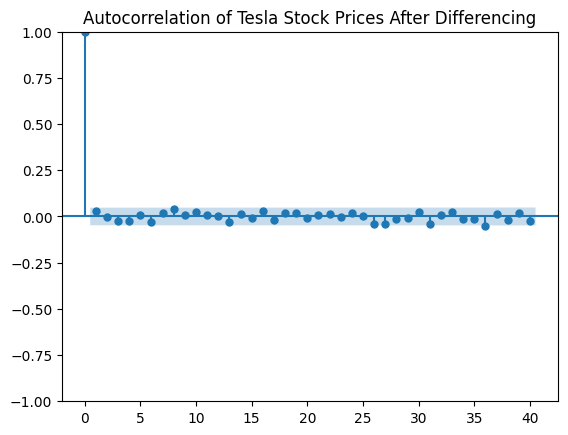

In [123]:
plt.figure(figsize=(8, 4))
plot_acf(ts_diff, lags=40, alpha=0.05)
plt.title("Autocorrelation of Tesla Stock Prices After Differencing")
plt.show()

<Figure size 800x400 with 0 Axes>

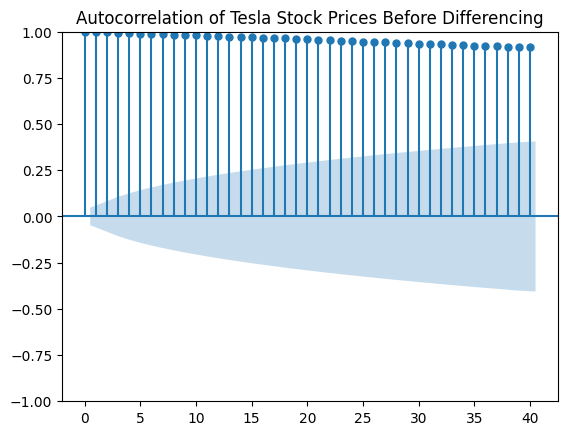

In [124]:
plt.figure(figsize=(8, 4))
plot_acf(ts, lags=40, alpha=0.05)
plt.title("Autocorrelation of Tesla Stock Prices Before Differencing")
plt.show()

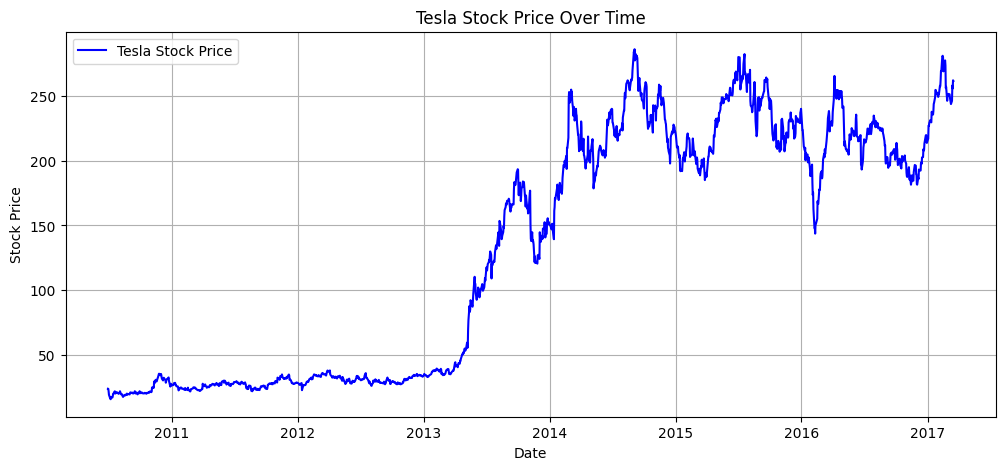

In [125]:
plt.figure(figsize=(12, 5))
plt.plot(ts, label="Tesla Stock Price", color='blue')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


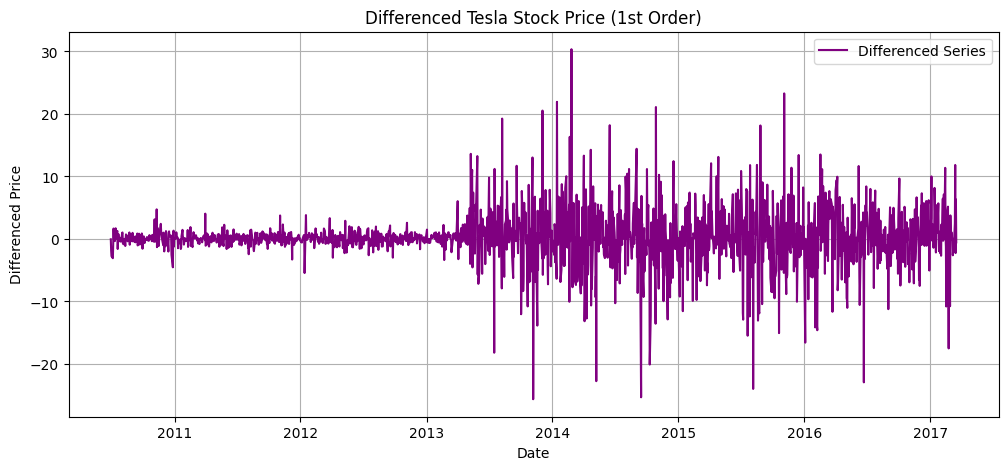

In [126]:
plt.figure(figsize=(12, 5))
plt.plot(ts_diff, label="Differenced Series", color='purple')
plt.title("Differenced Tesla Stock Price (1st Order)")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.grid()
plt.show()

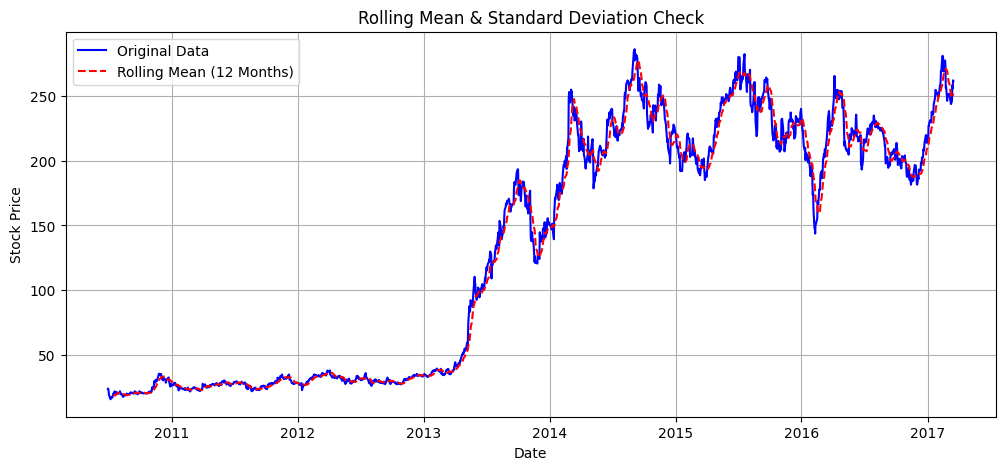

In [128]:
plt.figure(figsize=(12, 5))
plt.plot(ts, label="Original Data", color='blue')
plt.plot(ts.rolling(window=12).mean(), label="Rolling Mean (12 Months)", linestyle="dashed", color='red')
plt.title("Rolling Mean & Standard Deviation Check")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()